In [2]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.isnull().sum().sort_values(ascending=False)

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


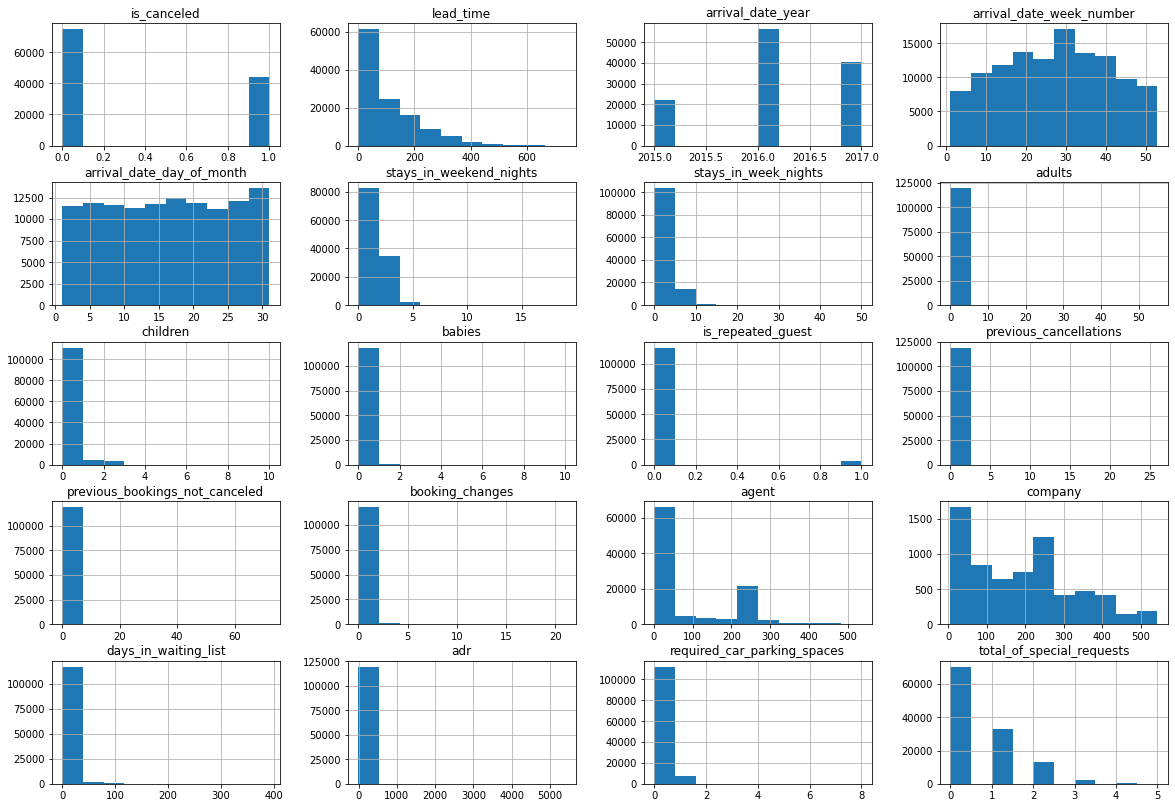

In [6]:
df.hist(figsize=(20,14))
plt.show()

In [7]:
nan_replacements = {"country": "Unknown", "agent": 0, "company": 0}
df = df.fillna(nan_replacements)
df["meal"].replace("Undefined", "SC", inplace=True)
nan_value = float("NaN")
df.replace(nan_value, 0.0,  inplace=True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
zero_guests = list(df.loc[df["adults"]
                   + df["children"]
                   + df["babies"]==0].index)
df.drop(df.index[zero_guests], inplace=True)
df.drop_duplicates(inplace=True)

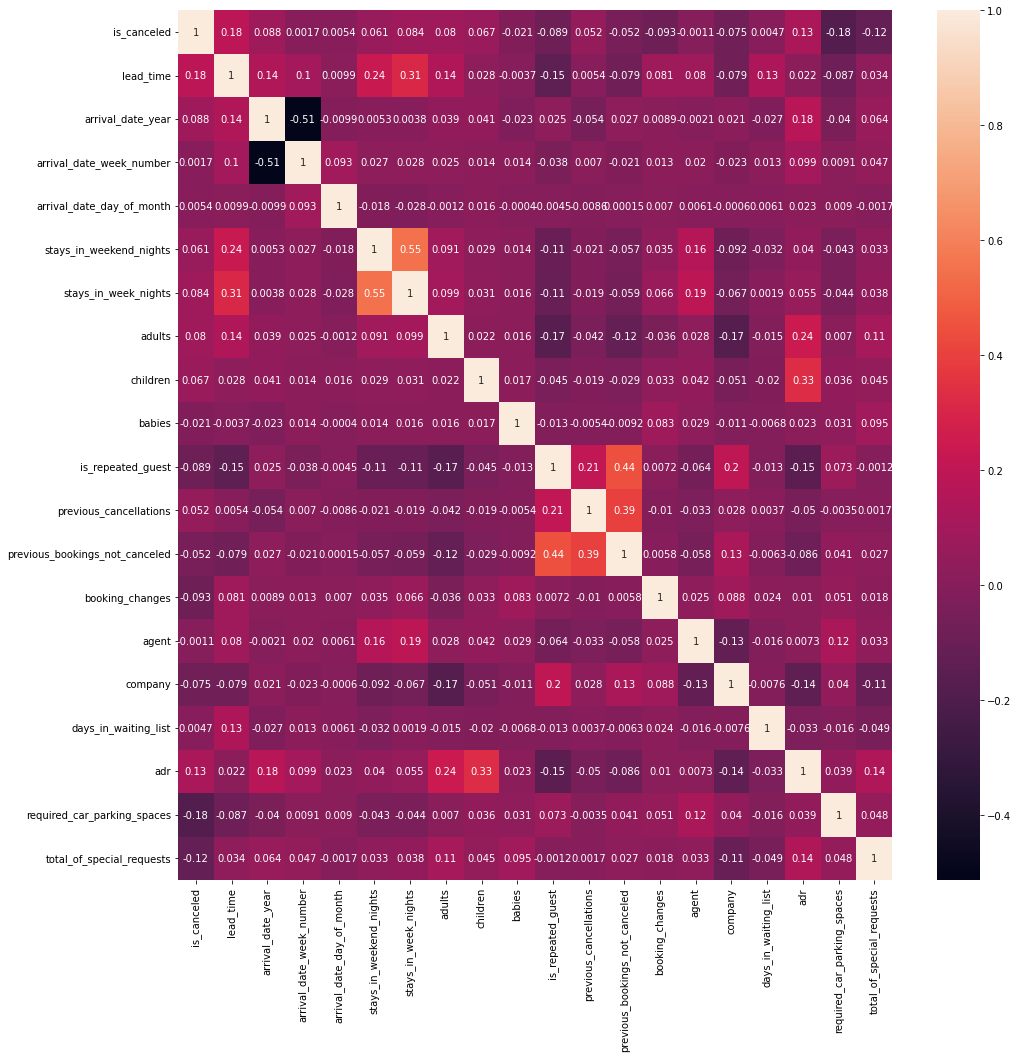

In [8]:
plt.figure(figsize = (16,16))
ax=sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
target_correlation = df.corr()['is_canceled'].sort_values(ascending = False) #.abs()
target_correlation

In [10]:
df = df.drop(['reservation_status_date', 'reservation_status'],axis=1)

In [11]:
num_features = ['lead_time','arrival_date_year','arrival_date_week_number','stays_in_weekend_nights',
               'stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations',
                'previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces',
                'total_of_special_requests']
cat_features = ['hotel', 'arrival_date_month','meal','market_segment',
                'distribution_channel','reserved_room_type','assigned_room_type','deposit_type','agent',
                'company','customer_type']
features = num_features + cat_features

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_data = df[cat_features]
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type
0,1,5,0,3,1,2,2,0,0,0,2
1,1,5,0,3,1,2,2,0,0,0,2
2,1,5,0,3,1,0,2,0,0,0,2
3,1,5,0,2,0,0,0,0,221,0,2
4,1,5,0,6,3,0,0,0,174,0,2
...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,5,3,0,0,0,272,0,2
119386,0,1,0,6,3,4,4,0,9,0,2
119387,0,1,0,6,3,3,3,0,9,0,2
119388,0,1,0,6,3,0,0,0,78,0,2


In [13]:
num_data = df[num_features]
num_data['children'] = num_data['children'].astype('int')

In [14]:
X = pd.concat([cat_data, num_data], axis = 1)
y = df['is_canceled']
print(X.shape,y.shape)

(87230, 27) (87230,)


In [15]:
X.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,1,5,0,3,1,2,2,0,0,0,...,0,0,0,0,0,3,0,0.0,0,0
1,1,5,0,3,1,2,2,0,0,0,...,0,0,0,0,0,4,0,0.0,0,0
2,1,5,0,3,1,0,2,0,0,0,...,0,0,0,0,0,0,0,75.0,0,0
3,1,5,0,2,0,0,0,0,221,0,...,0,0,0,0,0,0,0,75.0,0,0
4,1,5,0,6,3,0,0,0,174,0,...,0,0,0,0,0,0,0,98.0,0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

## HW 4 Tasks
TO-DO:
For the selected model, prepare a knitr / jupyter notebook in html or pdf format by solving the points below. 
- Calculate the permutational importance of the variables for the selected model.
- Compare the importance of the variables from (1) with the results of this method used for other models.
- Comment on the individual results obtained in the above paragraphs.

### Step 1: Model training

#### Random Forest

In [17]:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

In [18]:
rf_model_enh.fit(X_train, y_train)

RandomForestClassifier(max_features=0.4, n_estimators=160, n_jobs=-1,
                       random_state=0)

In [19]:
rf_model_enh.score(X_test, y_test)

0.8224616913141504

#### GBM

In [20]:
gbm = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [21]:
gbm.score(X_test, y_test)

0.8085903167870381

#### SVM

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

svm = SVC(kernel= 'rbf',
 random_state=0,
 verbose= False)            
pipeline = Pipeline([("scale", MinMaxScaler(feature_range=(0, 1))),
                     ("svm", svm)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', MinMaxScaler()), ('svm', SVC(random_state=0))])

In [23]:
pipeline.score(X_test, y_test)

0.7834078489816195

### Step 2: Profiles Calculation

In [24]:
import dalex as dx

In [25]:
X_train.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'company', 'customer_type', 'lead_time',
       'arrival_date_year', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [26]:
guests = ['adults','children','babies', 'customer_type','is_repeated_guest', 'country']
time_related = ['arrival_date_month', 'arrival_date_year','arrival_date_week_number',
                'lead_time', 'days_in_waiting_list']
stay_details = ['required_car_parking_spaces', 'total_of_special_requests','reserved_room_type',
                       'assigned_room_type', 'meal', 'hotel','stays_in_weekend_nights',
               'stays_in_week_nights']
booking_details = ['deposit_type','agent',
                'company','previous_cancellations',
                'previous_bookings_not_canceled','booking_changes', 'market_segment', 'distribution_channel']

variable_groups = {'guests': guests,
                   'time_related': time_related,
                   'stay_details': stay_details,
                   'booking_details': booking_details,}

#### VIP for Random Forest

In [27]:
rf_exp = dx.Explainer(rf_model_enh, X_test, y_test, label="Random Forest")
mp_rf = rf_exp.model_parts(N=3000, B=15)
mp_rf.result

Preparation of a new explainer is initiated

  -> data              : 26169 rows 27 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 26169 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest
  -> predict function  : <function yhat_proba_default at 0x7f4943f700d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.282, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00647, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


,variable,dropout_loss,label
0,arrival_date_month,0.140027,Random Forest
1,adults,0.140959,Random Forest
2,company,0.141321,Random Forest
3,babies,0.141608,Random Forest
4,_full_model_,0.141621,Random Forest
5,meal,0.141625,Random Forest
6,days_in_waiting_list,0.141638,Random Forest
7,distribution_channel,0.141964,Random Forest
8,children,0.142321,Random Forest
9,is_repeated_guest,0.142443,Random Forest


In [28]:
mp_rf.plot()

Unsupported

The plot above suggests that the most important variable is `lead_time`, so it might be interesting to take a closer look between the mean values of this variable for cancelled and not cancelled reservations. The second and third variables are related in a way (in my opinion), and the specificity of the request might be a good suggestion of how likely are the guests to cancel. The fourth variable, `market_segment`, is the last one that has a somewhat higher importance and might also be good to dive deeper into, as it might suggest that some of the groups are more certain not to cancel. For a hotel, that would mean that it should focus on some segments (maybe through discount programs or ads, sorry, I got a little bit carried away with that :)). 

#### VIP for GBM

In [29]:
gbm_exp = dx.Explainer(gbm, X_test, y_test, label="GBM")
mp_gbm = gbm_exp.model_parts(N=3000, B=15)
mp_gbm.result

Preparation of a new explainer is initiated

  -> data              : 26169 rows 27 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 26169 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : GBM
  -> predict function  : <function yhat_proba_default at 0x7f4943f700d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00197, mean = 0.274, max = 0.996
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.903, mean = 0.00161, max = 0.975
  -> model_info        : package sklearn

A new explainer has been created!


,variable,dropout_loss,label
0,company,0.158176,GBM
1,is_repeated_guest,0.158186,GBM
2,babies,0.158186,GBM
3,days_in_waiting_list,0.158186,GBM
4,_full_model_,0.158186,GBM
5,hotel,0.158196,GBM
6,stays_in_weekend_nights,0.158245,GBM
7,meal,0.158279,GBM
8,arrival_date_month,0.158456,GBM
9,children,0.158490,GBM


In [30]:
mp_gbm.plot()

Unsupported

Here we see quite a similar situation, although the drop-out loss is a bit smaller. The second and third variables switched places, and the `customer_type` has smaller importance, but the leader is still the `lead_time`.

#### VIP for SVM

In [31]:
svm_exp = dx.Explainer(pipeline, X_test, y_test, label="SVM")
mp_svm = svm_exp.model_parts(N=3000, B=15)
mp_svm.result

Preparation of a new explainer is initiated

  -> data              : 26169 rows 27 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 26169 values
  -> model_class       : sklearn.svm._classes.SVC (default)
  -> label             : SVM
  -> predict function  : <function yhat_default at 0x7f4943f70040> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.128, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.147, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


,variable,dropout_loss,label
0,arrival_date_week_number,0.351843,SVM
1,distribution_channel,0.353235,SVM
2,stays_in_week_nights,0.356406,SVM
3,babies,0.356835,SVM
4,_full_model_,0.356850,SVM
5,stays_in_weekend_nights,0.356930,SVM
6,arrival_date_month,0.356992,SVM
7,adults,0.357126,SVM
8,days_in_waiting_list,0.357245,SVM
9,previous_cancellations,0.357400,SVM


In [32]:
mp_svm.plot()

Unsupported

In the last case the losses are even smaller, and now the `lead_time` is 3 positions down, yet it's worth to notice that `agent`,  `lead_time` and `hotel` have similar importance. And `customer_type` and `required_car_parking_spaces` have the same drop-out loss. Yet the values are quite small and might depend on the random nature of permutation.

### Comparison & Conclusion

We see that for different models, we obtained somewhat different results; however, if we compare the plots, we can see that there are the variables that always are one of the most important ones, these are `lead_time`, `market_segment`, `total_of_special_requests`, `agent`, `assigned_room_type`, `required_car_parking_spaces` and `customer_type`. This knowledge is a great pointer for future EDA, model tuning and possible data modifications. None of the variables have a deciding role, as all of them have some drop-out loss, but not a single one has a big enough.  We can also observe that for different models, different variables are more important. The plots are easy to understand, as they are compact and present the most important variables in a single graph. 